In [2]:
from IPython.display import Image, display

# NEWTON: 

El método de Newton es un algoritmo para encontrar soluciones de ecuaciones o sistemas de ecuaciones no lineales. 

# 1D: 

En 1 dimensión buscamos resolver $f(x) = 0 $ (es decir, buscar $x$ tal que $f(x) = 0$) donde $f(x)$ es una función continua y derivable. 

En Newton, reemplazamos $f(x)$ por su aproximación lineal, recta tangente, en el punto actual $(x_k)$:

$y \approx f(x_k) + f’(x_k) \cdot (x - x_k)$

Donde la derivada nos indica la pendiente de la curva en $x_k$ y $(x - x_k)$ el desplazamiento horizontal respecto a $x_k$

Para encontrar el próximo punto $x_{k+1}$, buscamos dónde esta recta corta al eje x, es decir, imponemos $y = 0$. 

$0 = f(x_k) + f’(x_k) \cdot (x_{k+1} - x_k)$

Notar que la variable $x$ pasó a llamarse $x_{k+1}$ porque este valor será la nueva aproximación en la iteración siguiente.

Despejando $x_{k+1}$ obtenemos: 

$x_{k+1} = x_k - \frac{f(x_k)}{f’(x_k)}$

A partir de esta ecuación iteramos. 

DUDAS QUE PUEDEN SURGIR ->
1. Por que no usar $f(x)$ directo? Porque $f(x)$ puede ser complicada y no sabemos resolverla de forma exacta! Newton reemplaza a la curva complicada por una más simple que si sabemos resolverÑ la recta tangente al punto actual $x_k$. 
2. Por que siempre vamos al cero de la tangente? Como la tangente es nuestra aproximación a la función, su cero es nuestra mejor suposición de dónde esta el cero real. Repitiendo el proceso vamos afinando la aproximación.


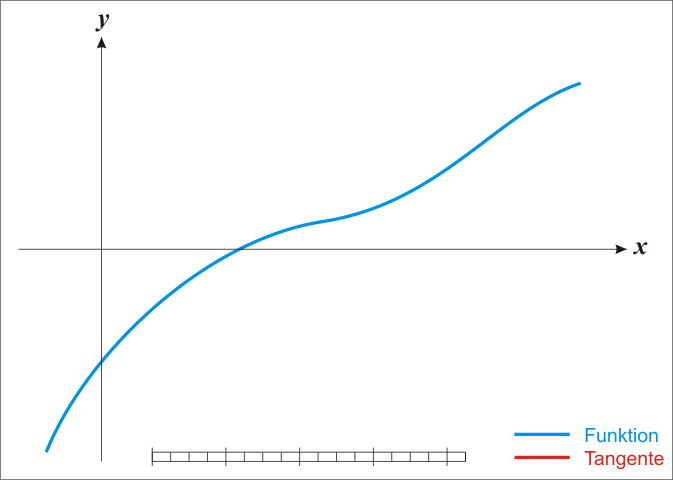

In [3]:
Image(filename="imgs/newton1d.gif")

# 2D: 
En dos dimensiones, queremos resolver: 
$F(\mathbf{X}) = 0$ , $\mathbf{X} = (x, y)$
Donde F es un vector de funciones no lineales.

$F(\mathbf{X}) = $
$ \begin{bmatrix}
F_1(x,y) \\
F_2(x,y)
\end{bmatrix} $

y queremos encontrar $(x, y)$ tal que ambas ecuaciones se cumplan $(F_1(x,y) = 0$ y $F_2(x,y) = 0)$

La derivada $f’(x_k)$ (1D) se reemplaza por el Jacobiano $J(\mathbf{X}_k)$, que contiene las derivadas parciales de cada ecuación respecto a cada variable. Asi reemplazamos a $F(\mathbf{X})$ por su aproximación lineal (en este caso planos tangentes)

$F(\mathbf{X}) \approx F(\mathbf{X}_k) + J(\mathbf{X}_k) \cdot (\mathbf{X} - \mathbf{X}_k)$

Donde $J(\mathbf{X}_k)$ es el Jacobiano de F en $\mathbf{X}_k$

![jacobiano](imgs/jacob.webp)

Cada fila corresponde a la pendiente de una de las funciones $F_i$ respecto a cada variable.

Al igual que en 1D, buscamos el punto donde esta aproximación lineal vectorual se anula, es decir, imponemos:

$\mathbf{0} = \mathbf{F}(\mathbf{x}_k) + J(\mathbf{x}_k) \cdot (\mathbf{x}_{k+1} - \mathbf{x}_k)$

Despejamos y llegamos a la ecuación a iterar:

$\mathbf{x}_{k+1} = \mathbf{x}_k - J(\mathbf{x}_k)^{-1} \, \mathbf{F}(\mathbf{x}_k)$


# Ejemplo Newton 2D

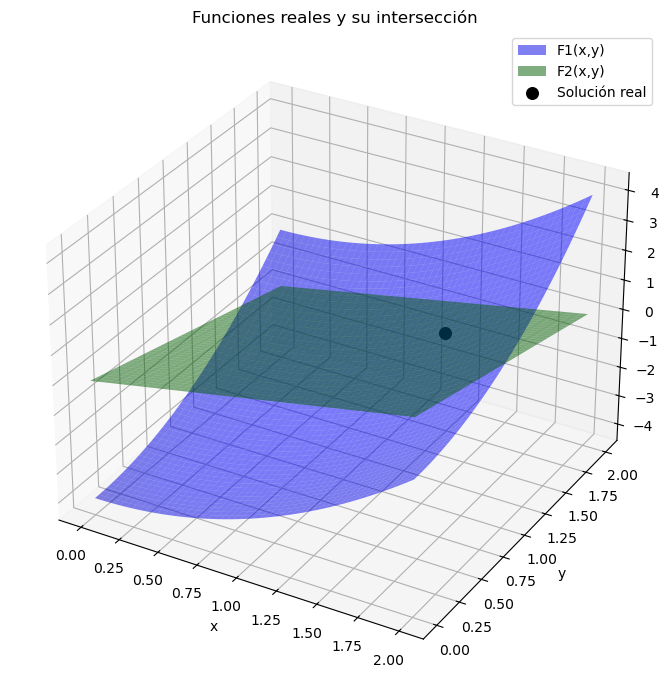

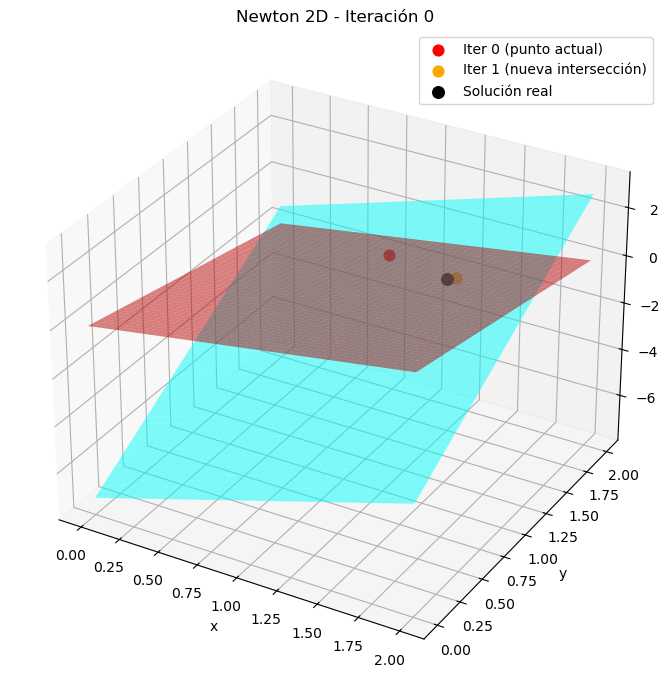

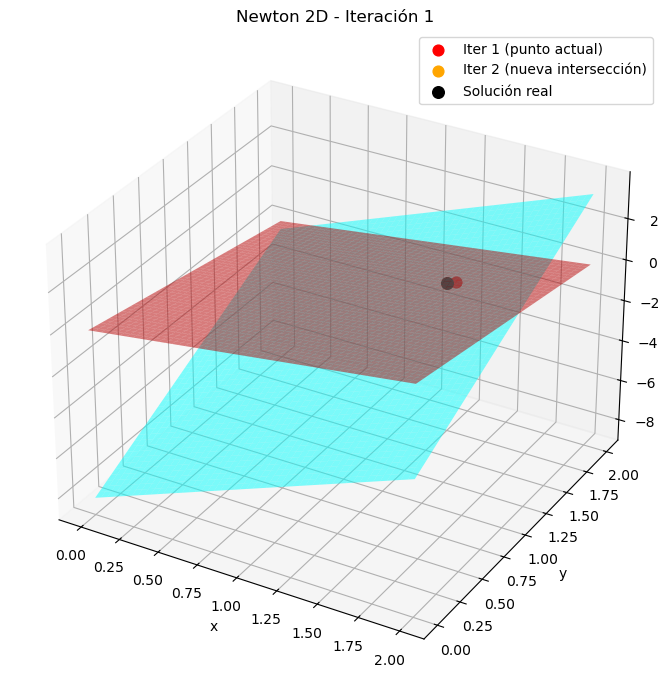

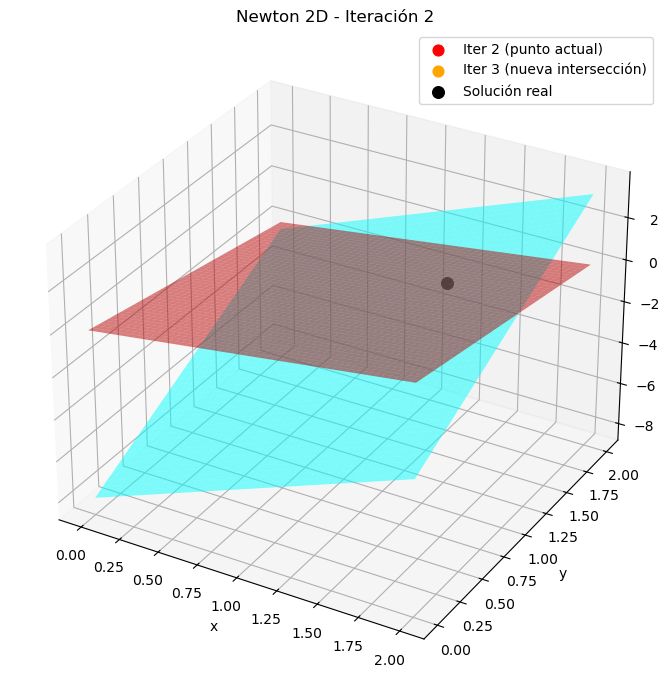

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def F(X):
    x, y = X                      
    return np.array([x**2 + y**2 - 4, x - y])

def J(X):
    x, y = X        #El Jacobiano es la matriz de derivadas parciales de F
    return np.array([[2*x, 2*y],
                     [1,   -1]])

# --- Implementación de Newton en 2D ---
def newton_2d(F, J, x0, max_iter=3):
    Xs = [np.array(x0, dtype=float)] #lista para guardar iterados: X0, X1, ..., Xk
    for _ in range(max_iter):
        xk = Xs[-1]                  #punto actual x_k=
        # *** PASO DE NEWTON (1/2): resolver J(x_k) * step = -F(x_k) ***
        # Esto linealiza el sistema en x_k (planos tangentes) y busca el corte con z=0.
        step = np.linalg.solve(J(xk), -F(xk))
        # *** PASO DE NEWTON (2/2): actualizar x_{k+1} = x_k + step ***
        Xs.append(xk + step)
    return Xs

# --- Semilla inicial y corrida de Newton ---
X0 = (1.0, 1.5)                    
iters = newton_2d(F, J, X0, max_iter=3)  

x_vals = np.linspace(0, 2, 50)       
y_vals = np.linspace(0, 2, 50)       
Xg, Yg = np.meshgrid(x_vals, y_vals) # grilla (Xg, Yg)
Z1 = Xg**2 + Yg**2 - 4               # z = F1(x,y)
Z2 = Xg - Yg                         # z = F2(x,y)

sol = (np.sqrt(2), np.sqrt(2))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Xg, Yg, Z1, alpha=0.5, color='blue',  label='F1(x,y)')
ax.plot_surface(Xg, Yg, Z2, alpha=0.5, color='green', label='F2(x,y)')

ax.scatter(sol[0], sol[1], 0, color='black', s=70, label="Solución real")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Funciones reales y su intersección")
ax.legend()
plt.tight_layout()
plt.show()

for k in range(len(iters)-1):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    xk, yk = iters[k]                
    Fk = F((xk, yk))                
    Jk = J((xk, yk))                 

    slope_x1, slope_y1 = Jk[0]      
    Z1_tangent = Fk[0] + slope_x1 * (Xg - xk) + slope_y1 * (Yg - yk)
    ax.plot_surface(Xg, Yg, Z1_tangent, alpha=0.5, color='cyan')

    slope_x2, slope_y2 = Jk[1]       
    Z2_tangent = Fk[1] + slope_x2 * (Xg - xk) + slope_y2 * (Yg - yk)
    ax.plot_surface(Xg, Yg, Z2_tangent, alpha=0.5, color='red')

    ax.scatter(xk, yk, 0, color='red',    s=60, label=f"Iter {k} (punto actual)")
    xkp1, ykp1 = iters[k+1]
    ax.scatter(xkp1, ykp1, 0, color='orange', s=60, label=f"Iter {k+1} (nueva intersección)")
    ax.scatter(sol[0], sol[1], 0, color='black', s=70, label="Solución real")

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f"Newton 2D - Iteración {k}")
    ax.legend()
    plt.tight_layout()
    plt.show()

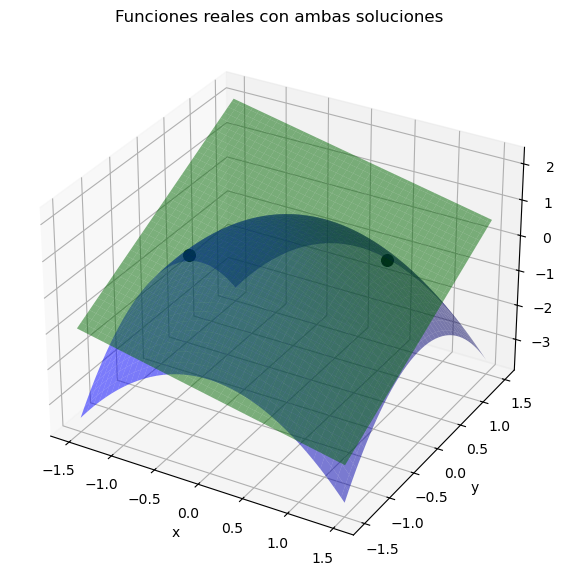

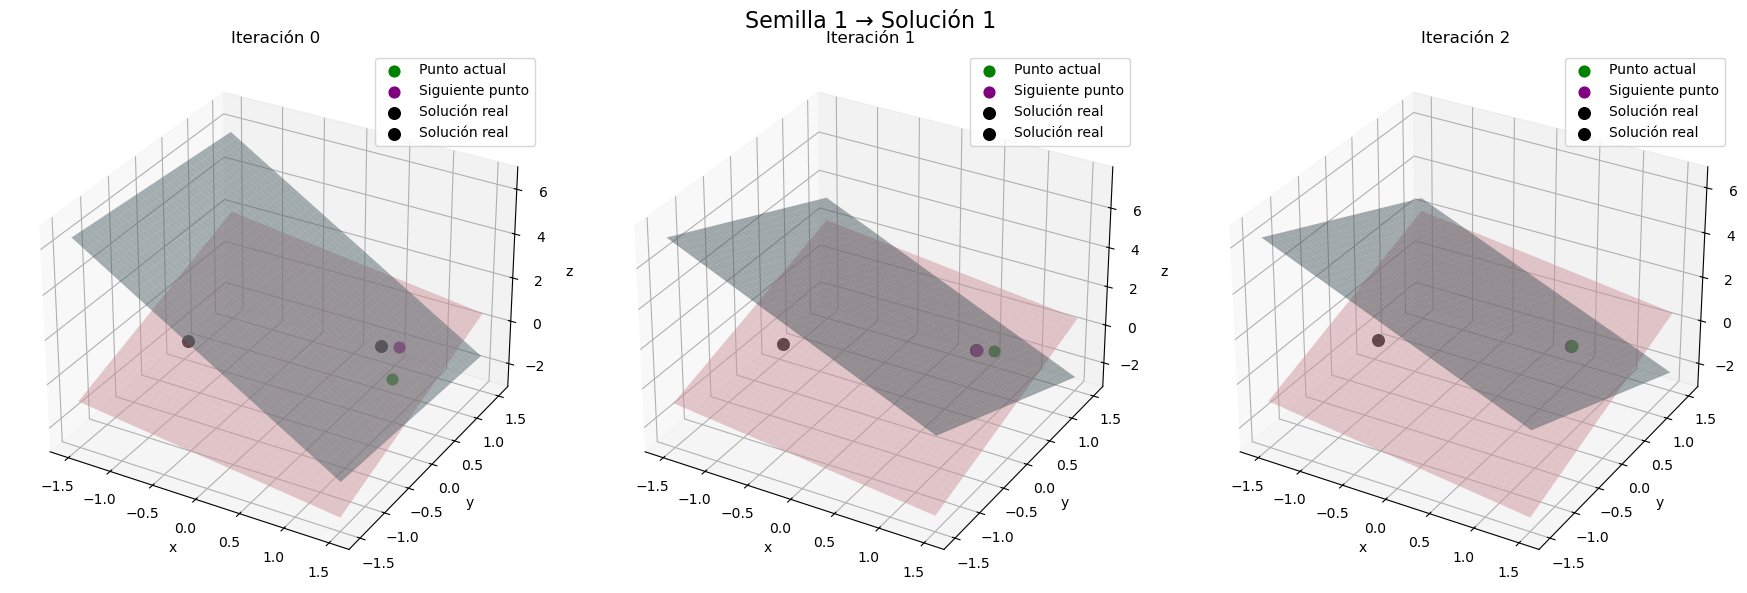

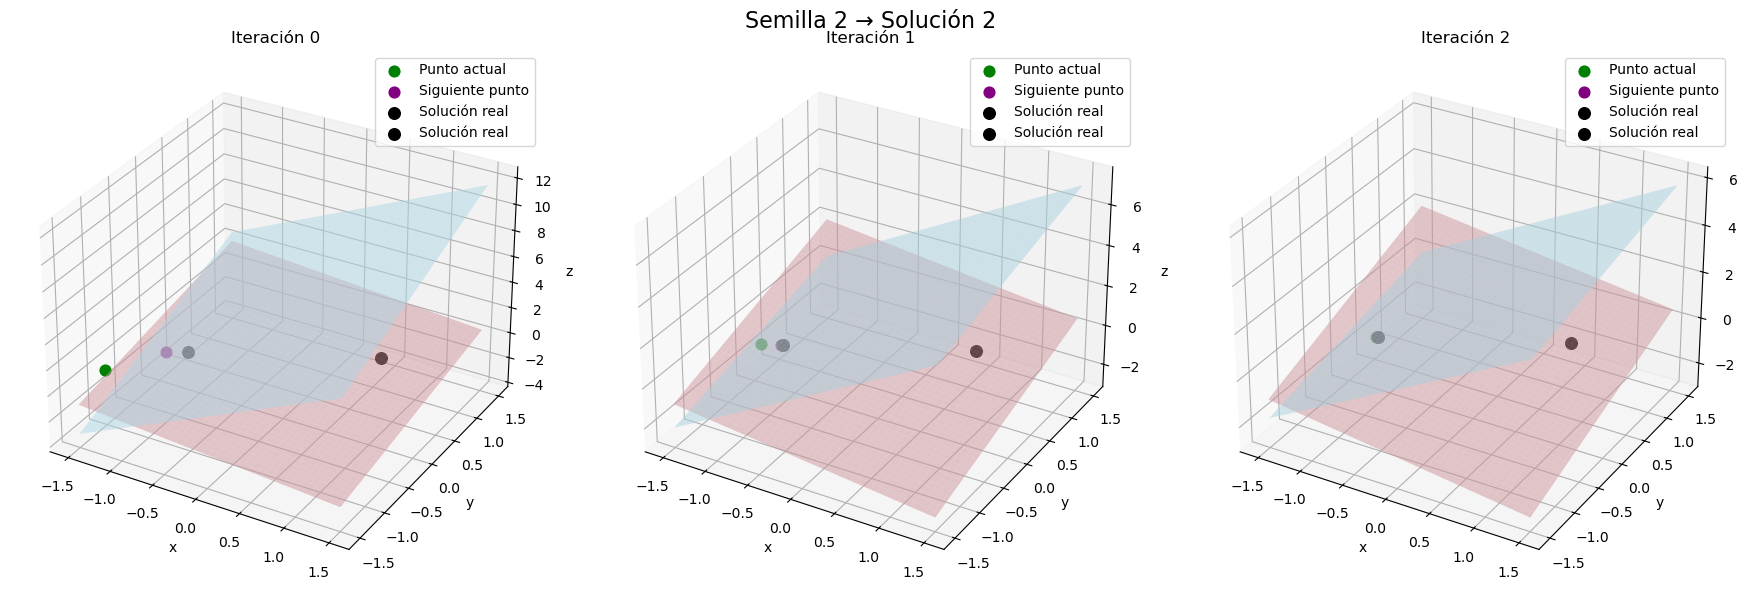

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def F(X):
    x, y = X
    r2 = x**2 + y**2
    f1 = 1 - r2                     
    f2 = y - 0.5*x - 0.2             
    return np.array([f1, f2])

def J(X):
    x, y = X
    df1_dx = -2*x
    df1_dy = -2*y
    df2_dx = -0.5
    df2_dy = 1
    return np.array([[df1_dx, df1_dy],
                     [df2_dx, df2_dy]])

def newton_2d(F, J, x0, max_iter=3):
    Xs = [np.array(x0, dtype=float)]
    for _ in range(max_iter):
        xk = Xs[-1]
        step = np.linalg.solve(J(xk), -F(xk))
        Xs.append(xk + step)
    return Xs

m, b = 0.5, 0.2
A = 1 + m**2
B = 2*m*b
C = b**2 - 1
xs_sol = np.roots([A, B, C])
ys_sol = m*xs_sol + b
soluciones = list(zip(xs_sol, ys_sol))

x_vals = np.linspace(-1.5, 1.5, 80)
y_vals = np.linspace(-1.5, 1.5, 80)
Xg, Yg = np.meshgrid(x_vals, y_vals)
Z1 = 1 - (Xg**2 + Yg**2)       # f1
Z2 = Yg - 0.5*Xg - 0.2         # f2

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Z1, alpha=0.5, color='blue')
ax.plot_surface(Xg, Yg, Z2, alpha=0.5, color='green')
for sx, sy in soluciones:
    ax.scatter(sx, sy, 0, color='black', s=70, label="Solución real")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Funciones reales con ambas soluciones")
plt.show()

def plot_iteraciones(seed, soluciones, titulo):
    iters = newton_2d(F, J, seed, max_iter=3)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

    for k in range(3):
        ax = axes[k]

        xk, yk = iters[k]
        Fk = F((xk, yk))
        Jk = J((xk, yk))

        slope_x1, slope_y1 = Jk[0]
        Z1_tangent = Fk[0] + slope_x1 * (Xg - xk) + slope_y1 * (Yg - yk)
        ax.plot_surface(Xg, Yg, Z1_tangent, alpha=0.5, color='lightblue')

        slope_x2, slope_y2 = Jk[1]
        Z2_tangent = Fk[1] + slope_x2 * (Xg - xk) + slope_y2 * (Yg - yk)
        ax.plot_surface(Xg, Yg, Z2_tangent, alpha=0.5, color='lightpink')

        ax.scatter(xk, yk, 0, color='green', s=60, label="Punto actual")
        xkp1, ykp1 = iters[k+1]
        ax.scatter(xkp1, ykp1, 0, color='purple', s=60, label="Siguiente punto")

        for sx, sy in soluciones:
            ax.scatter(sx, sy, 0, color='black', s=70, label="Solución real")

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title(f"Iteración {k}")
        ax.legend(loc='upper right')

    fig.suptitle(titulo, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_iteraciones(seed=(1.2, 0.1), soluciones = soluciones, titulo="Semilla 1 → Solución 1")

plot_iteraciones(seed=(-1.5, -1), soluciones = soluciones, titulo="Semilla 2 → Solución 2")